<a id='0'></a>
# Содержание
[Описание проекта](#-1)<br>
[1 Обзор данных](#1)<br>
[2 Предобработка данных](#2)<br>
[3 Анализ данных](#3)<br>
[4 Портрет пользователя каждого региона](#4)<br>
[5 Проверка гипотез](#5)<br>
[6 Общий вывод](#6)<br>

<a id='-1'></a>
# Анализ рынка компьютерных игр
[К содержанию](#0)<br><br>
Интернет-магазин **«Стримчик»** продаёт компьютерные игры во всём мире. Представлены исторические данные из открытых источников о продажах игр в разных регионах, оценках пользователей и экспертов, жанрах и платформах до **2016 года**. В наборе данных присутствуют сведения о возрастном рейтинге, который определяет ассоциация **ESRB** *(Entertainment Software Rating Board)*. *Считаем, что в данный момент декабрь 2016 года, и планируется кампания на 2017 год.*

**Цель исследования**<br>
Целью исследования является определение закономерностей, определяющих успешность игры, так как это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**<br>
Данные об играх хранятся в файле `games.csv`. Первоначально проводится анализ и предобработка полученных из файла данных. Также при необходимости будут добавлены дополнительные колонки (столбец с общими продажами), которые помогут в проведении исследования. Затем проводится анализ обработанных данных и получение из них дополнительной информации в виде срезов или новых датафреймов. Согласно проведенному анализу составляется портрет среднего покупателя в зависимости от региона, а после этого проверяются выдвинутые гипотезы.

Исходя из вышесказанного, определим этапы исследования следующим образом:
- Обзор данных
- Предобработка данных и добавление дополнительных данных, нужных для оценки
- Анализ данных по параметрам (столбцам)
- Составление портрета пользователя каждого региона
- Проверка выдвинутых гипотез
- Общий вывод

<a id='1'></a>
## Обзор данных
[К содержанию](#0)

In [ ]:
#импорт библиотек
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from math import sqrt

In [ ]:
#загрузка данных
games = pd.read_csv('games.csv')

In [ ]:
#вывод основной информации о датафрейме
games.info()
games.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Загрузка датафрейма**<br>
Загруженный файл содержит столбцы:
- `Name` - название игры
- `Platform` - платформа
- `Year_of_Release` - год выпуска
- `Genre` - жанр игры
- `NA_sales` - продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` - продажи в Европе (миллионы проданных копий)
- `JP_sales` - продажи в Японии (миллионы проданных копий)
- `Other_sales` - продажи в других странах (миллионы проданных копий)
- `Critic_Score` - оценка критиков (максимум 100)
- `User_Score` - оценка пользователей (максимум 10)
- `Rating` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br><br>
Необработанная таблица содержит 16715 строк и 11 столбцов. Наблюдаются пропуски в ячейках и неоптимальные типы данных у столбцов - необходима обработка перед проведением анализа.


<a id='2'></a>
## Предобработка данных
[К содержанию](#0)

In [ ]:
#изменим регистр в названиях столбцов
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
#поменяем типы данных в столбце year_of_release
display(games['year_of_release'].unique())
games['year_of_release'] = games['year_of_release'].fillna(0).astype('int')

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
#поменяем типы данных в столбце critic_score
display(games['critic_score'].unique())
display(games.query('critic_score == 0'))
games['critic_score'] = games['critic_score'].fillna(-1).astype('int')

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
#рассмотрим значения в столбце user_score и поменяем тип при возможности
display(games['user_score'].unique())
display(games.query('user_score == "tbd"'))
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1
games['user_score'] = games['user_score'].fillna(-1)
games['user_score'] = pd.to_numeric(games['user_score'])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,-1,tbd,E


In [ ]:
#ещё раз выведем информацию о таблице и отдельно информацию о пропусках
games = games.drop_duplicates()
games.info()
games.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

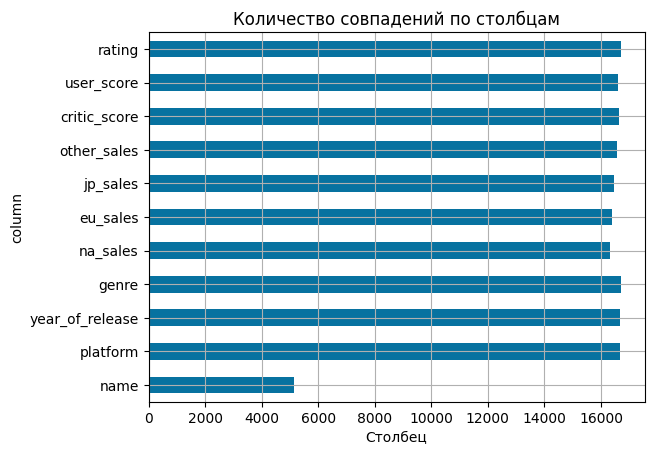

In [ ]:
#проверим неполные дубликаты по столбцам
implicit_dup_col = []
for i in games.columns:
    imp = games[i].name, games[i].duplicated().sum()
    implicit_dup_col.append(imp)

implicit_dup_col = pd.DataFrame(implicit_dup_col, columns=['column', 'total'])
implicit_dup_col.set_index('column').plot.barh(title='Количество совпадений по столбцам',\
                                           xlabel='Столбец', color='#0772a0', grid=True, legend=False);

In [ ]:
#к совпадениям в названиях стоит присмотреться. проверим неполные дубликаты по нескольким столбцам
display(games[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])
games.loc[604, 'na_sales': 'other_sales'] += games.loc[16230, 'na_sales': 'other_sales']
games = games.drop(16230)
games.loc[604]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1.0,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


name               Madden NFL 13
platform                     PS3
year_of_release             2012
genre                     Sports
na_sales                    2.11
eu_sales                    0.23
jp_sales                     0.0
other_sales                 0.23
critic_score                  83
user_score                   5.5
rating                         E
Name: 604, dtype: object

In [ ]:
#сначала разберемся с пропусками в name и genre
display(games[games['name'].isna()])
display(games[games['genre'].isna()])
games = games[games['name'].notna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1.0,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1.0,NaN


In [ ]:
#обработаем пропуски в столбце rating
display(games[games['rating'].isna()].describe())
games['rating'] = games['rating'].fillna('tbd')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000
mean,1978.799823,0.183424,0.090671,0.124472,0.022324,-0.145772,-0.898729
std,227.326472,0.796083,0.348012,0.383076,0.092140,7.789788,0.906812
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,1999.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
50%,2007.000000,0.000000,0.000000,0.020000,0.000000,-1.000000,-1.000000
75%,2011.000000,0.120000,0.050000,0.100000,0.010000,-1.000000,-1.000000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,93.000000,9.200000


In [ ]:
#ещё раз выведем информацию о таблице после заполнения пропусков для проверки
games.info()
games.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  int64  
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [ ]:
#проверим значения в столбцах platform, rating и genre на предмет неявных дубликатов
display(games['platform'].unique())
display(games['rating'].unique())
games['genre'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['E', 'tbd', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
#при анализе было обнаружено аномальное значение для консоли DS - удалим его
games.query('platform == "DS" and 0 < year_of_release < 2004')
games = games.drop(15957)

In [ ]:
#добавим дополнительный столбец с общими продажами
#games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,tbd,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,tbd,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,tbd,28.31


In [ ]:
#проверка
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16711 non-null  int64  
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     16711 non-null  int64  
 9   user_score       16711 non-null  float64
 10  rating           16711 non-null  object 
 11  total_sales      16711 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.7+ MB


**Подготовка таблицы для анализа**<br>
После первичного осмотра загруженного датафрейма были выявлены пропуски и несоответсвующие типы данных, а также верхний регистр в названиях столбцов. Для удобства названия столбцов были переведены в нижний регистр.<br><br>
Далее переходим к типам данных столбцов. У столбца `year_of_release` тип данных изменен на `int64`, так как год выпуска может быть только целым числом. Изначально в столбце `year_of_release` присутсвуют как раз целые значения и `nan` - определить это помогает команда `unique`. Для удобства перед изменением типа данных заменим значения `nan` на `0` - дальше при анализе будем учитывать, что `0` означает отсутсвующее значение года выпуска.<br>
Проверим столбец `critic_score`. В нём тоже только целочисленные значения и `nan`. Аналогично для удобства заменим значения `nan` и поменяем тип данных на `int64`. По списку значений можем определить, что изначально игр с оценкой критиков 0 нет, однако такая оценка возможна, поэтому для удобства поставим значение `-1`.<br>
В столбце `user_score` присутствует значение `tbd`. Это аббревиатура, которая чаще всего расшифровывается как *to be determined - будет определено*. Такую аббревиатуру используют в тех случаях, когда значение в данный момент неизвестно, и может использоваться не только для оценок, но и, например, для даты выхода игры, если она не была названа во время анонса. Мы работаем с данными на текущий момент времени, поэтому для нас значение `tbd` фактически равняется отсутствию значения.
Для перевода столбца в тип `float64` заменим `tbd` на `-1` - в столбце `user_score` изначально присутствуют значение `0`, поэтому мы сможем отличить их от того, что ранее было обозначено как `tbd`.<br><br>
Теперь обработаем оставшиеся пропуски. Сразу удалим возможные явные дубликаты. Есть всего две строки с пустыми значениями `name` и `genre` - эти строки тоже проще удалить, чтобы они не мешали в дальнейшем анализе.<br>
Остались пустые значения в столбце `rating`. Можно было бы оставить эти ячейки пустыми, но у нас имеется описанное выше универсальное значение `tbd`, которым и можно заполнить столбец `rating`.<br><br>
Основные пропуски находились в столбцах `user_score`, `critic_score` и `rating`. Данные для таблицы собираются из открытых источников, поэтому, скорее всего, данные просто отсутствовали по данным столбцам. Согласно данным о пропусках, полученным методом `describe`, у большинства игр без рейтинга отсутствуют данные о продажах везде, кроме Японии. Это может говорить о том, что в таблице имеются сведения об играх, выпущенных только в Японии, где не применяется рейтинг ESRB, а используется своя система от организации CERO. Это может объяснить пустые и нулевые значения в столбцах с рейтингом и оценками, так как игры не расходились большими тиражами, из-за чего сведений и обзоров было крайне мало, а рейтинг ESRB мог и не назначаться, так как игру не собирались выпускать в странах, которые используют рейтинговую систему ESRB.


<a id='3'></a>
## Анализ данных
[К содержанию](#0)

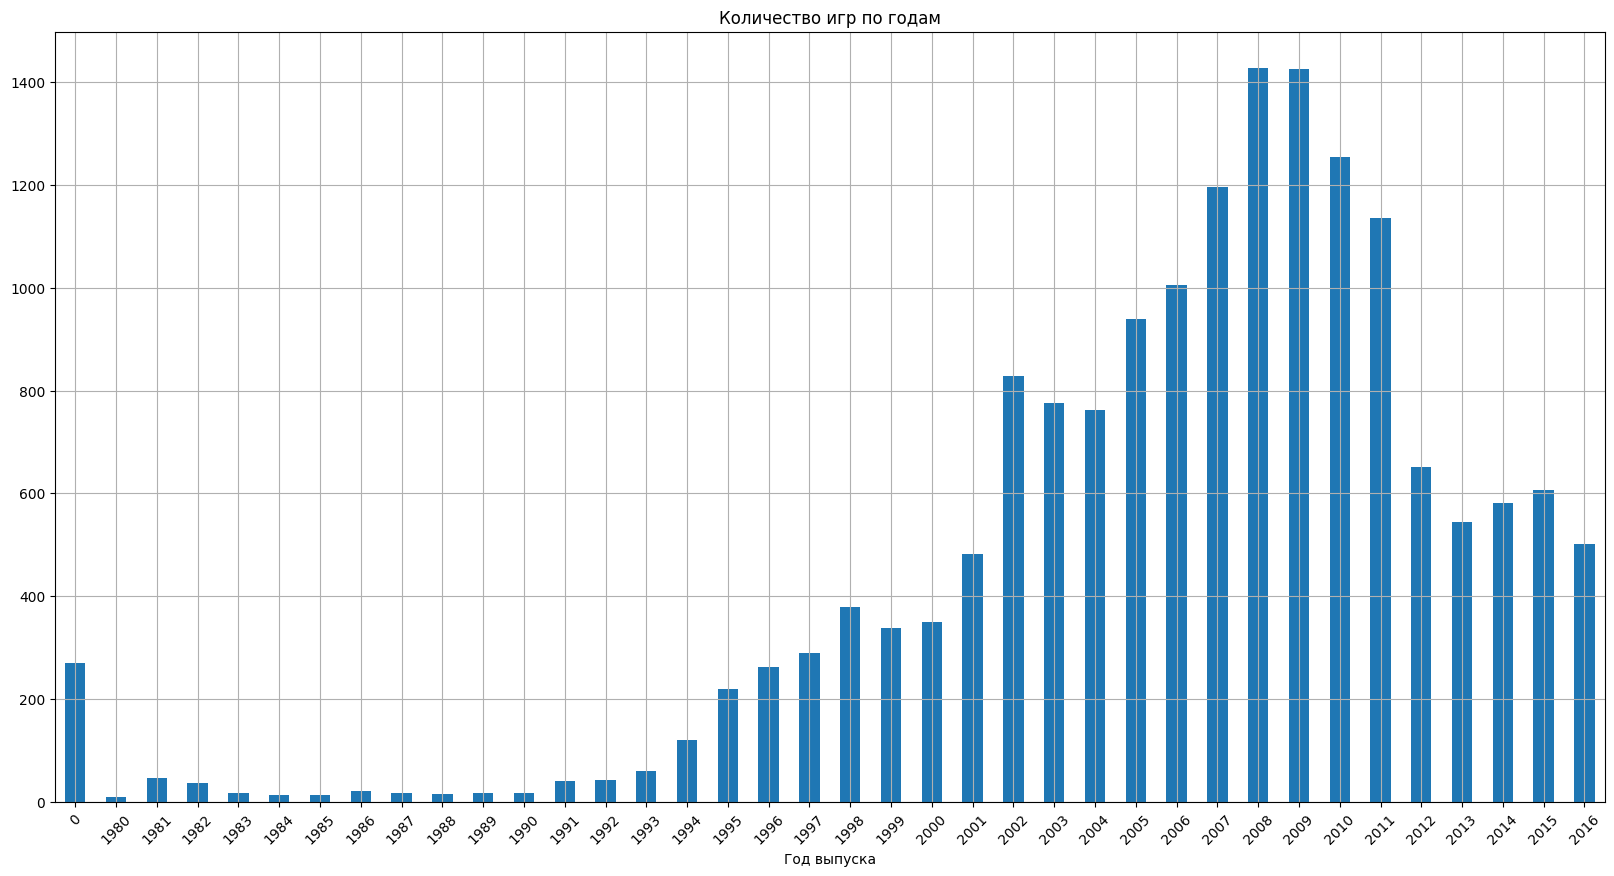

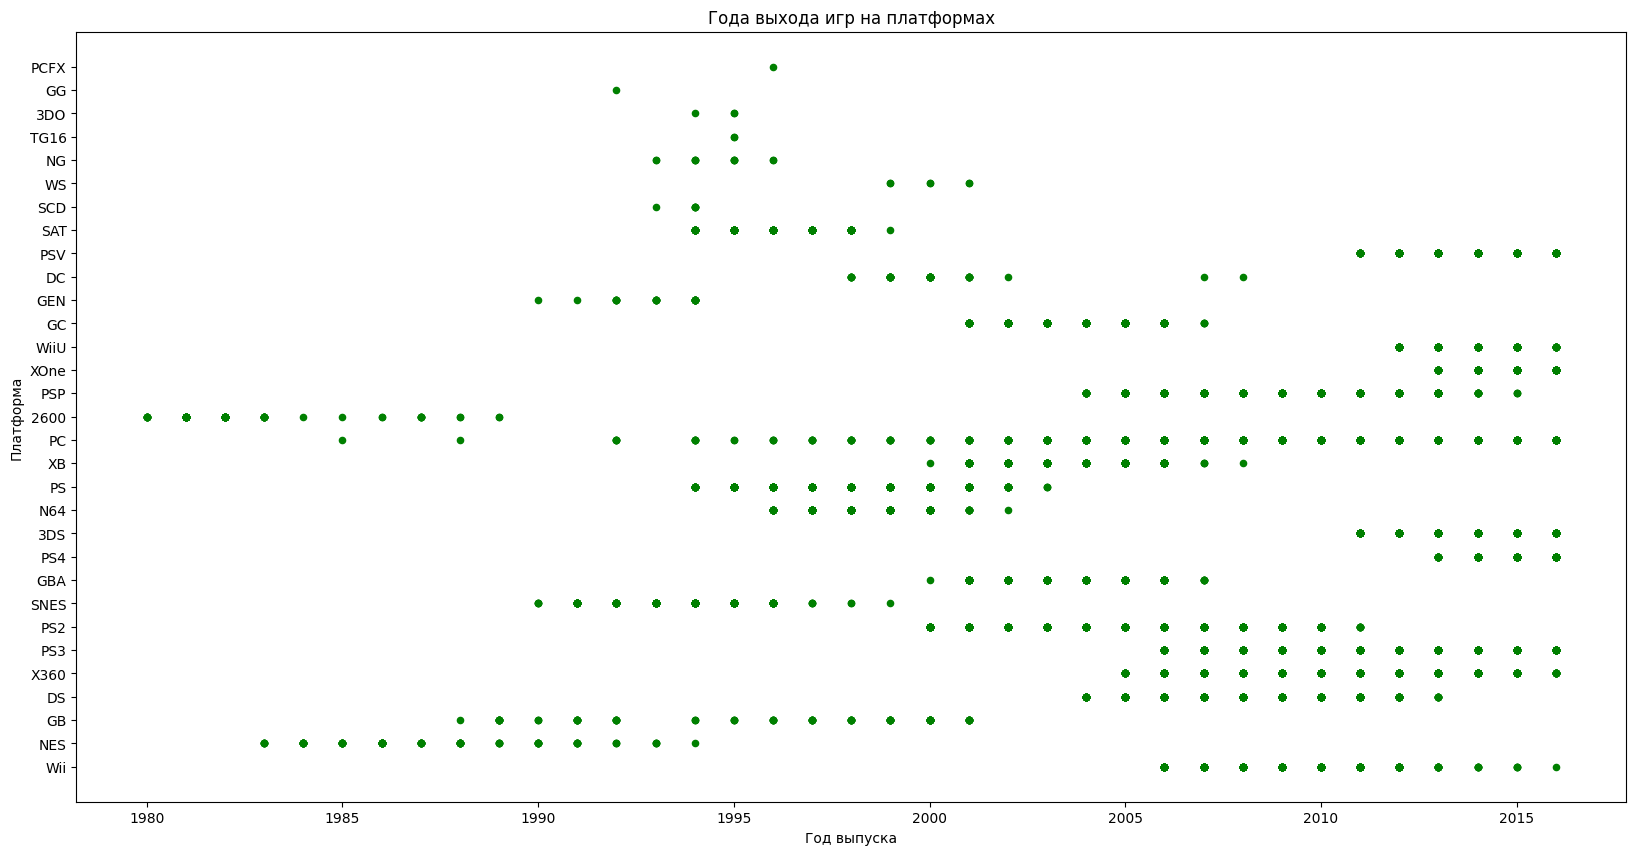

In [ ]:
#оценим данные по годам
games.groupby('year_of_release')['name'].count().plot(title='Количество игр по годам', kind='bar',\
                                                      figsize=(20,10),\
                                                      grid=True,\
                                                      rot=45,\
                                                      xlabel='Год выпуска');
games.query('year_of_release > 0').plot.scatter(title='Года выхода игр на платформах',\
                                                x='year_of_release', xlabel='Год выпуска',\
                                                y='platform', ylabel='Платформа',\
                                                figsize=(20,10), c='Green');

Плавный рост количества выпускаемых игр начинает прослеживаться уже с начала **90-х** годов, а после **2000** и вплоть до **2009** года идёт резкое увеличение релизов. Уже с **2010** года идёт значительное снижение, которое наблюдается и на момент конца **2016** года. Интересно, что, согласно графику, в **81** году игр выпущено больше, чем будет выпускаться ежегодно в течение последующих *10* лет. Видимо, в тот момент был повышенный по сравнению с ближайшими годами интерес к новой технологии, поэтому было много  тех, кто пытался попробовать себя на этом поприще. В дальнейшем же энтузиазма приабвлось только с **91** года. Падение количества выпускаемых игр после **2009** года может быть связано с мировым кризисом и, возможно, со значительным удорожанием разработки игр.

count      31.000000
mean      287.524839
std       348.219036
min         0.030000
25%        22.150000
50%       200.040000
75%       304.095000
max      1255.770000
Name: total_sales, dtype: float64

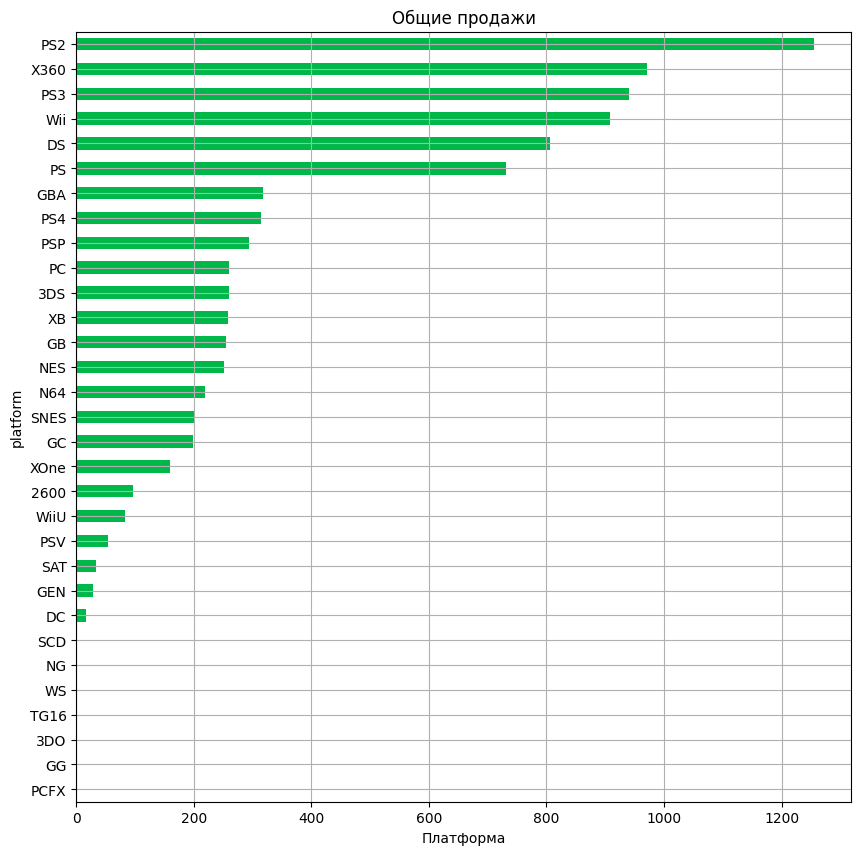

In [ ]:
#оценим данные по платформам
games.groupby('platform')['total_sales'].sum().sort_values().\
plot.barh(title='Общие продажи', figsize=(10,10), grid=True, color='#00b74a', xlabel='Платформа');

games.groupby('platform')['total_sales'].sum().describe()

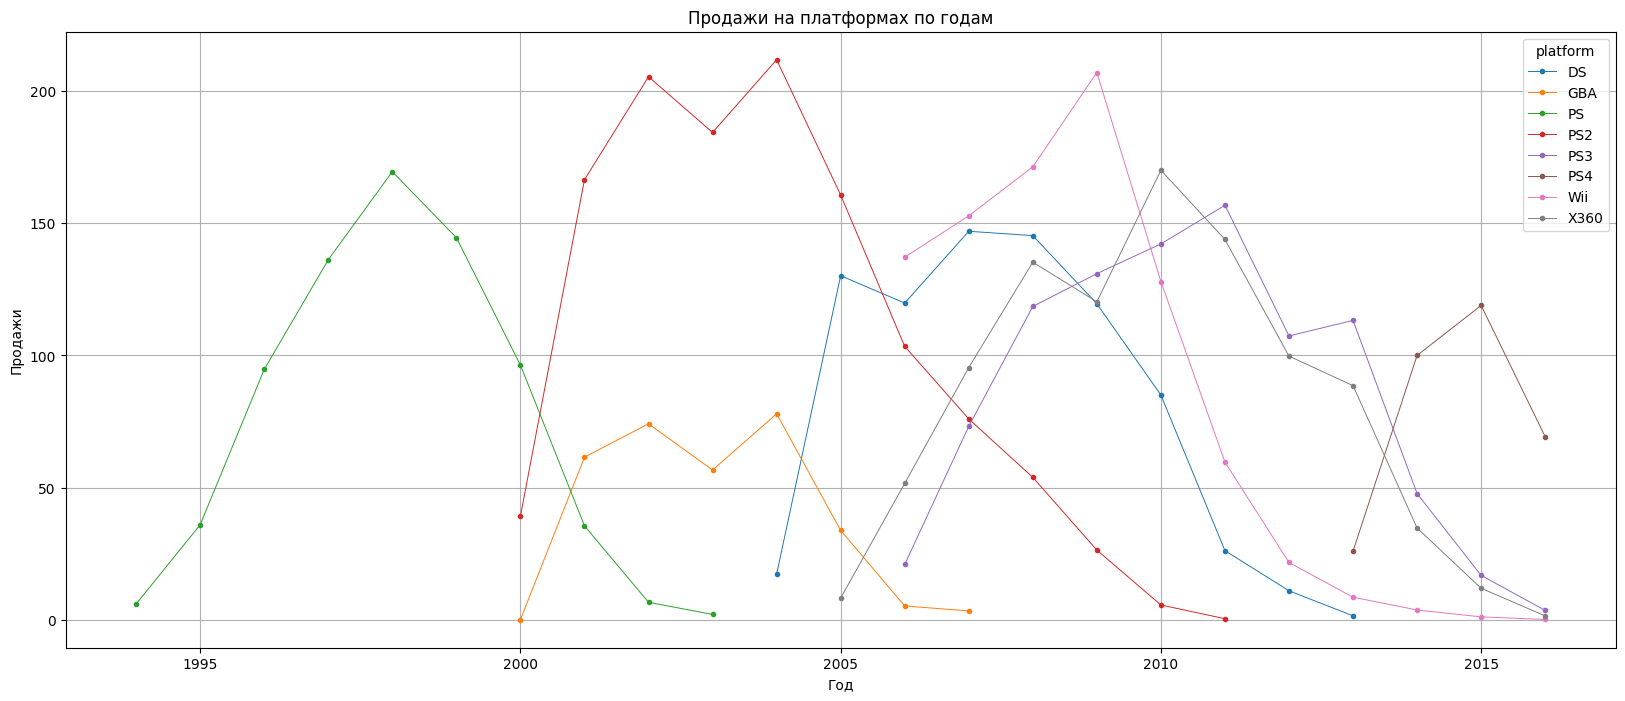

In [ ]:
#выделим платформы с наибольшими продажами и построим их распределения
plat_most_sales = games.groupby('platform').sum().query('total_sales > 304.095').index
games_plat_most_sales = games.query('platform in @plat_most_sales and year_of_release > 0')

games_plat_most_sales.\
pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=(sum)).\
plot(title='Продажи на платформах по годам', xlabel='Год', ylabel='Продажи',\
     grid=True, figsize=(20,8), style='.-', linewidth=0.7);

Очевидным лидером по продажам является **PS2**, колоссально опережающая ближайших соперников в период 2000-2005 года. Собственно, и более ранняя версия консоли **PS** также до сих пор держит высокое 6 место, хотя последние игры для неё зафиксированы аж в 2003 году. Второе место - за Microsoftовской  **XBox 360**, хотя по годам в лидерах продаж он был всего один раз. Третье место за снова за консолью от Sony **PS3**, а 4 и 5 место - за устройствами от Nintendo **Wii** и **DS**. Nintendo Wii доминировала на рынке начиная с выхода в 2006 году и до 2009 года, после которого интерес стал резко падать.

In [ ]:
#узнаем срок жизни платформ
life_of_platform = games.query('year_of_release != 0').pivot_table(index = 'platform',\
                                                                   values = 'year_of_release',\
                                                                   aggfunc=(min, max)).sort_values(by='min')
life_of_platform['life'] = life_of_platform['max'] - life_of_platform['min']
display(life_of_platform)
life_of_platform.describe()

,max,min,life
platform,,,
2600,1989,1980,9
NES,1994,1983,11
PC,2016,1985,31
GB,2001,1988,13
SNES,1999,1990,9
GEN,1994,1990,4
GG,1992,1992,0
SCD,1994,1993,1
NG,1996,1993,3


,max,min,life
count,31.000000,31.000000,31.000000
mean,2005.258065,1998.258065,7.000000
std,9.273503,8.850491,5.899152
min,1989.000000,1980.000000,0.000000
25%,1996.000000,1993.000000,3.000000
50%,2007.000000,1998.000000,6.000000
75%,2016.000000,2004.500000,10.000000
max,2016.000000,2013.000000,31.000000


Узнаём первый и последний года выпуска игр на каждой консоли, а **временем жизни** консоли будем считать разницу между этими значениями. Время жизни самых популярных консолей находится в районе **10-11 лет**, что соответвует *третьему квартилю* по времени жизни всех рассматриваемых консолей. Медианным значением является **6 лет** - и это легко заметить на примере тех же самых конслей от Sony. Разница между выходом разных версий *Playstation* как раз в районе 6-7 лет (между PS1 и PS2 6 лет, между PS2 и PS3 - тоже 6 лет, между PS3 и PS4 - 7 лет), откуда можно сделать вывод, что стандартным временем жизни считают **6 лет**. Да, на устаревшие консоли продолжают выходить игры, но упор на них уже явно не идёт. Это скорее порты новых игр, которые ещё может вытянуть устаревшее "железо".

In [ ]:
#сформируем датафрейм для дальнейшей работы
games_work = games.query('year_of_release >= 2013')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


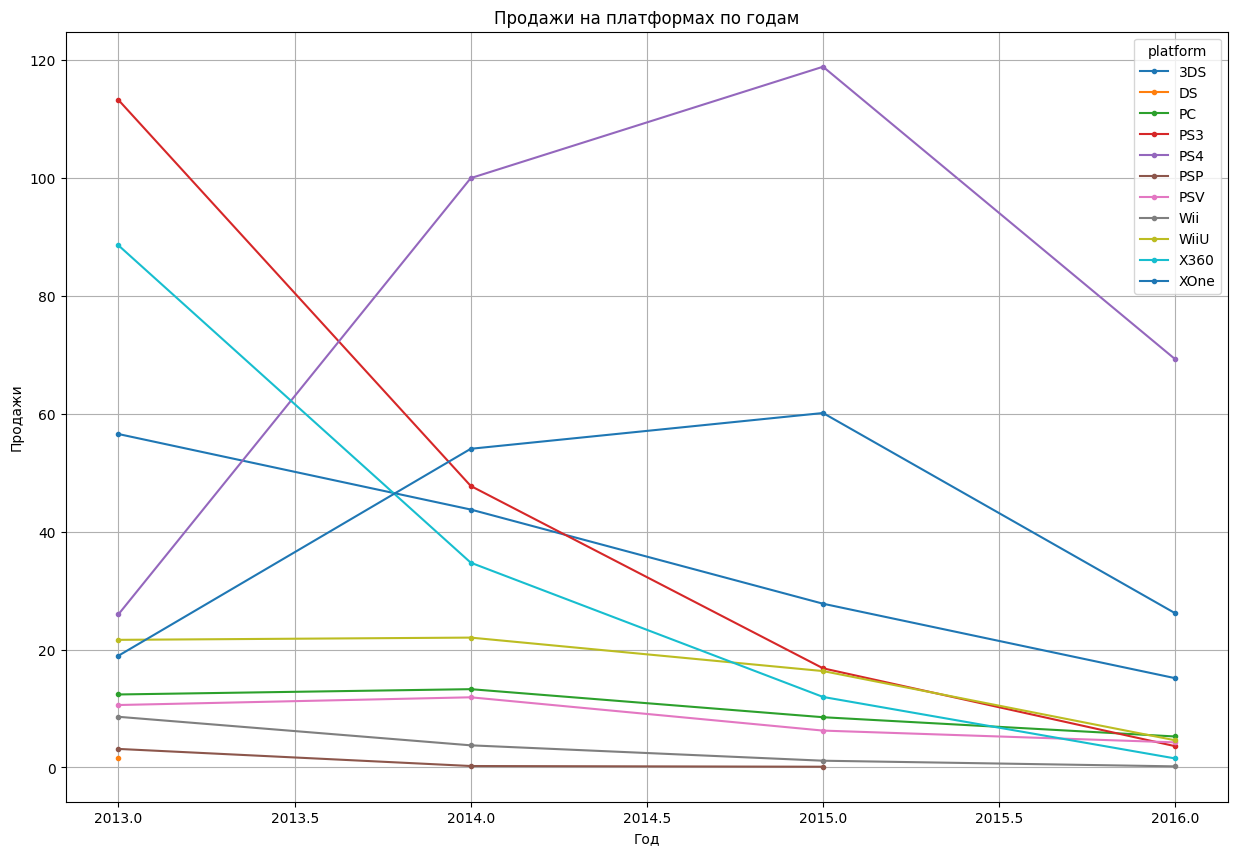

In [ ]:
#оценим продажи на актуальных платформах за актуальные года
games_work.\
pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=(sum)).\
plot(title='Продажи на платформах по годам', xlabel='Год', ylabel='Продажи',\
     grid=True, figsize=(15,10), style='.-', linewidth=1.5);

games_work.\
pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=(sum))

Необходимо выбрать актуальный период, который будет использоваться в дальнейшем для оценки данных. Для оценки самых актуальных трендов будем рассматривать самые новые консоли на момент 2016 года- это **Sony PlayStation 4** и **Microsoft Xbox One**.  Обе эти консоли вышли в **2013 году** - этот год и примем для начала выборки данных для дальнейшего анализа.<br>
Все построенные выше графики указывают на то, что продажи игр и в целом, и на каждой отдельно взятой консоли просели. Заметно, что лидерство удерживает **PS4**, далее следует **XBox One** (кстати, вышедший одновременно с **PS4**, да и тенденция у этих консолей практически идентичная), а замыкает тройку **3DS**. Продажи всех консолей, кроме самых свежих **PS4** и **XBox One**, уменьшаются с 2014 года. Этот спад может объясняться тем, что на **PS4** и **XBox One** начал расширяться диапазон предлагаемых игр, и если в первый год их существования ещё можно было думать - покупать новую перспективную консоль, на которой представлено не так много игр, или же взять старую, но с большой библиотекой - то по прошествии времени эта проблема стала отпадать вследствие увеличения предлагаемого ассортимента игр на консолях нового поколения.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05


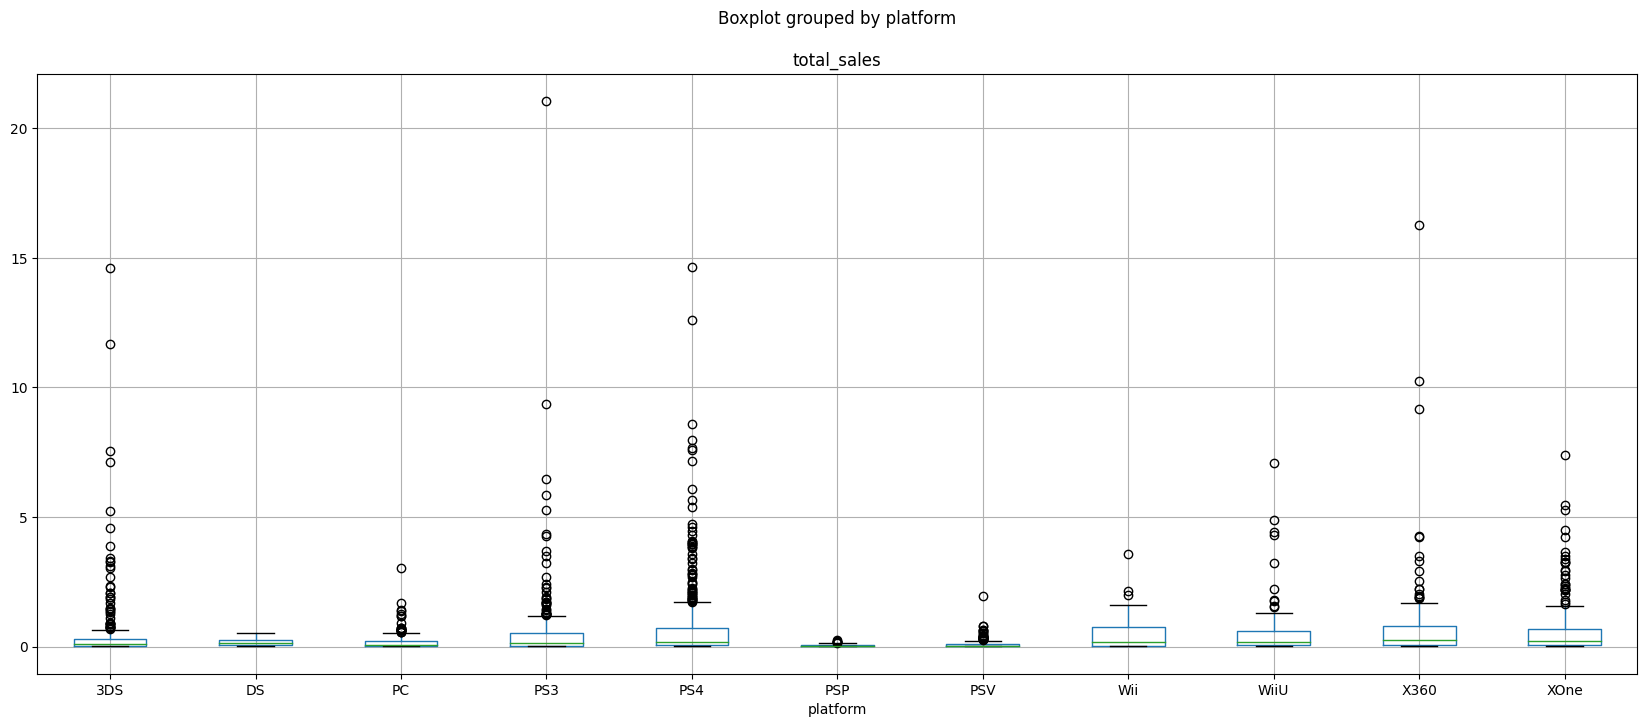

In [ ]:
#строим диаграмму размаха по глобальным продажам игр в разбивке по платформам
games_work.boxplot(by='platform', column='total_sales', figsize=(20,8));
games_work[games_work['total_sales'] == games_work['total_sales'].max()]


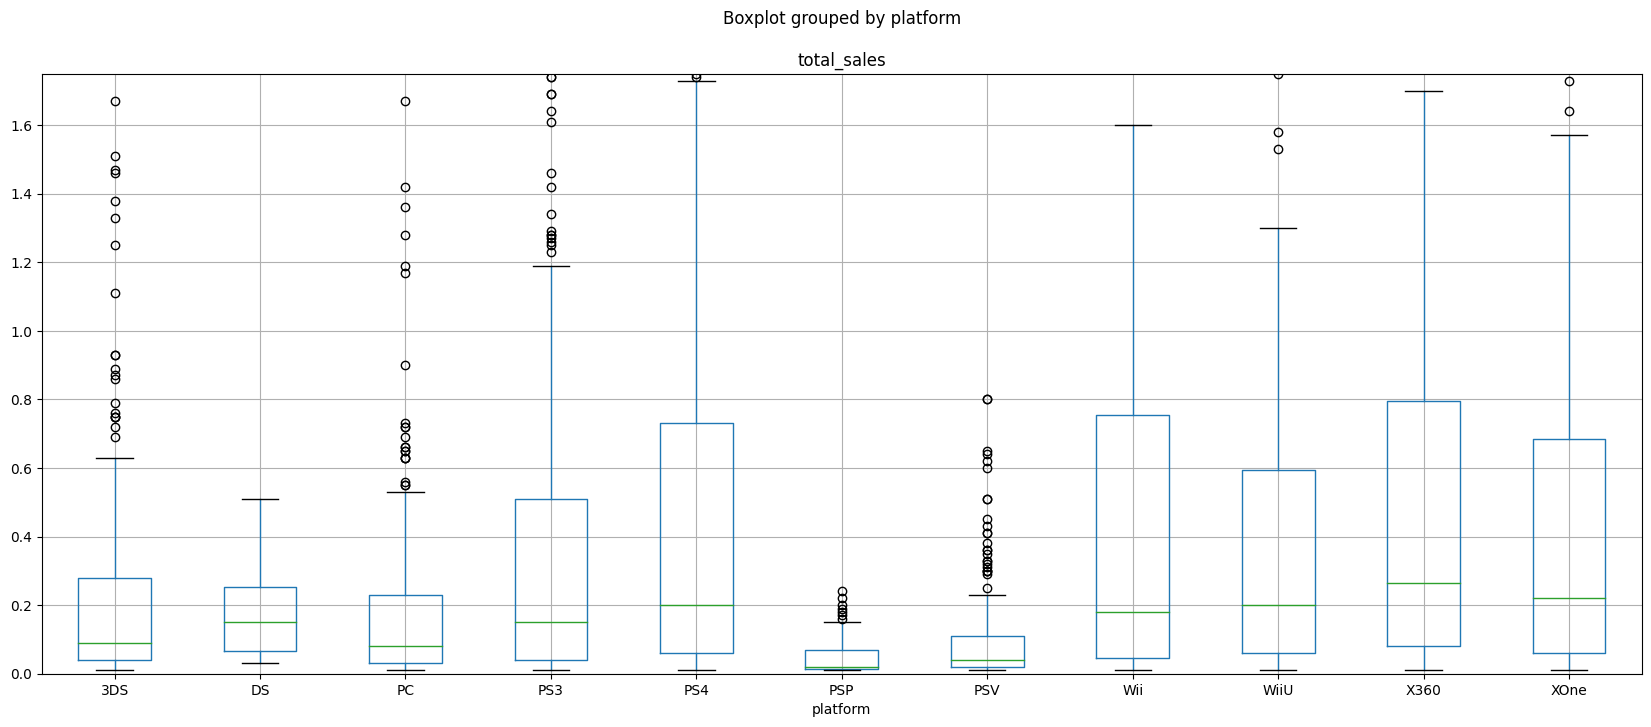

In [ ]:
#строим диаграмму размаха по глобальным продажам игр в разбивке по платформам
games_work.boxplot(by='platform', column='total_sales', figsize=(20,8));
plt.ylim(0,1.75);

Наивысшие медианные значения продаж на одну игру - у **PS3** и **XBox 360**, и находятся они в район 0.3 миллионов копий. Максимальные значение "нормальных" значений, не считающихся выбросами, находятся в области 1.6-1.75 миллионов копий - у **XBox 360**, **PS3** и **PS4**. Можно заметить, что медианное значение у **PS4** значительно ниже, чем у **PS3**, а граница выбросов оказывается выше. Также и медианное значение **XBox One** выше **PS4**.Даже после выхода более новой **PS4** всё равно лидерство по продажам с колоссальным отрывом держит **PS3** - и это лидерство у безусловного хита продаж *Grand Theft Auto V*.

Корреляция продаж от user_score -0.01
Корреляция продаж от critic_score 0.35


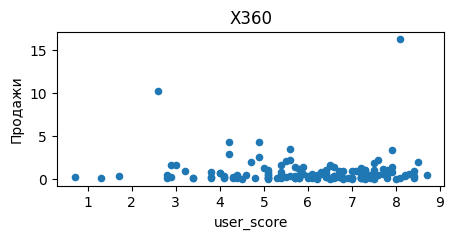

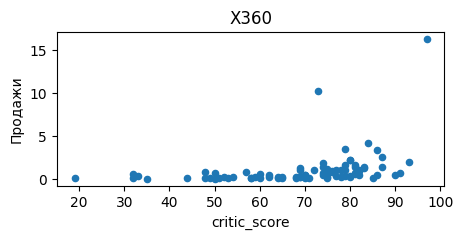

In [ ]:
#определим коэффициенты корреляции и построим диаграммы рассеяния для X360
def games_plat(plat, score):
    gam_plat = games_work.loc[(games_work['platform'] == plat) & (games_work[score] > 0)]
    gam_plat.plot.scatter(x=score, title=plat, y='total_sales', ylabel='Продажи', figsize=(5,2));
    print('Корреляция продаж от', score, round(gam_plat.corr(numeric_only=True).loc['total_sales', score], 2))

games_plat('X360', 'user_score')
games_plat('X360', 'critic_score')

Исходя из диаграмм рассеяния и коэффициентов корреляции, можно заключить, что наибольшая зависимость, хоть и не очень высокая, имеется между *оценками критиков и продажами игр на XBox 360* - около 0,35. Влияние оценок игроков гораздо ниже - всего -0.01. Можно предположить, что влияние оценок критиков выше, так каких обзор могут выходить раньше (могут представляться предрелизные версии игр) и на большую аудиторию. В то же время, оценки игроков идут уже после того, как игра куплена основной массой людей, из-за чего влияние на продажи снижено.

Название консоли: PS3
Корреляция продаж от user_score 0.0
Корреляция продаж от critic_score 0.33
Название консоли: PS4
Корреляция продаж от user_score -0.03
Корреляция продаж от critic_score 0.41
Название консоли: PC
Корреляция продаж от user_score -0.09
Корреляция продаж от critic_score 0.2
Название консоли: XOne
Корреляция продаж от user_score -0.07
Корреляция продаж от critic_score 0.42


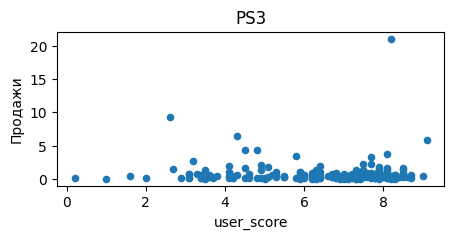

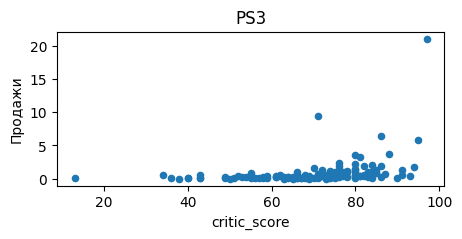

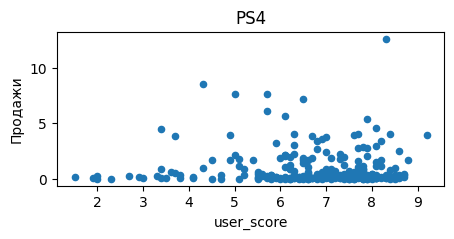

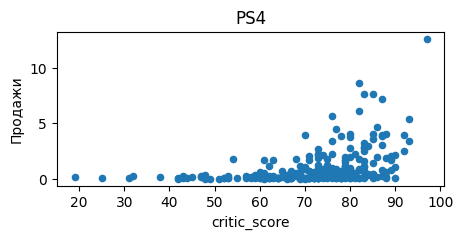

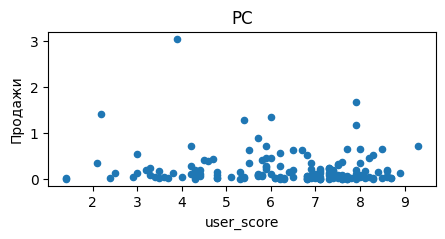

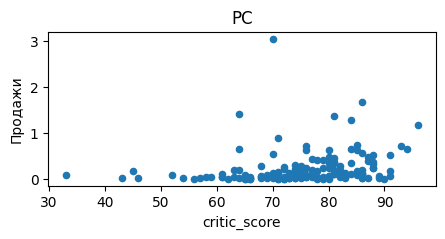

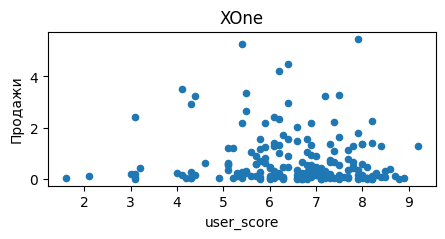

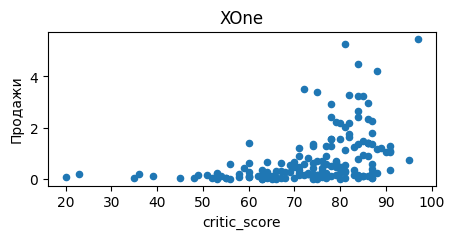

In [ ]:
#рассмотрим влияние на продажи игр на других популярных платформах отзывов пользователей и критиков
top_plats = ['PS3', 'PS4', 'PC', 'XOne']
for i in top_plats:
    print('Название консоли:', i)
    games_plat(i, 'user_score')
    games_plat(i, 'critic_score')

По другим консолям ситуация похожа. Также заметно влияние критиков и практически отсутствует влияние игроков. Наибольшее влияние оценок критиков на продажи - у самых свежих **XBox One** и **PS4**. Чуть меньше критики влияют на продажи **PS3**-игр и минимальное значение коэффициента корреляции - для игр на **PC**.

,name,total_sales,ratio
genre,,,
Action,766,321.87,0.420196
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972
Role-Playing,292,145.89,0.499623
Misc,155,62.82,0.405290
Platform,74,42.63,0.576081
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Adventure,245,23.64,0.096490


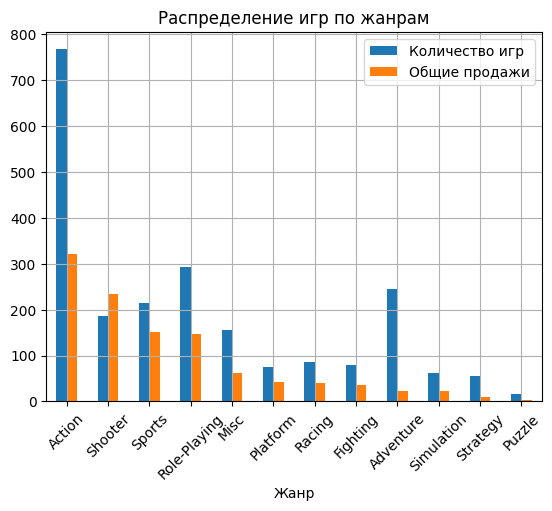

In [ ]:
#рассмотрим распределение игр по жанрам
games_work_genre = games_work.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).\
sort_values(by='total_sales', ascending=False)
games_work_genre.plot.bar(title='Распределение игр по жанрам', xlabel='Жанр', rot=45, grid=True);
plt.legend(['Количество игр', 'Общие продажи']);
games_work_genre['ratio'] = games_work_genre['total_sales'] / games_work_genre['name']
games_work_genre

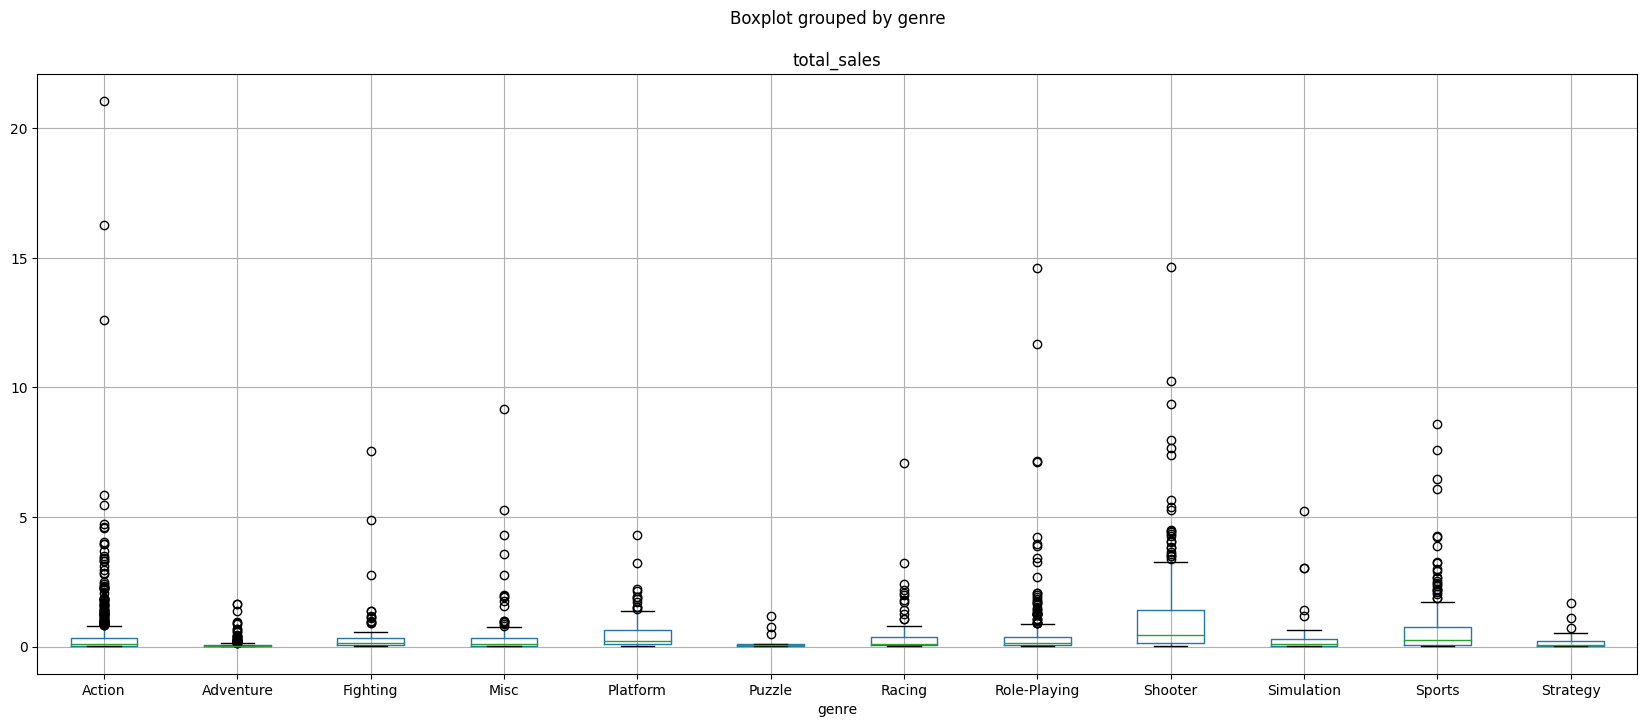

In [ ]:
#рассмотрим распределение игр по жанрам
games_work.boxplot(by='genre', column='total_sales', figsize=(20,8));

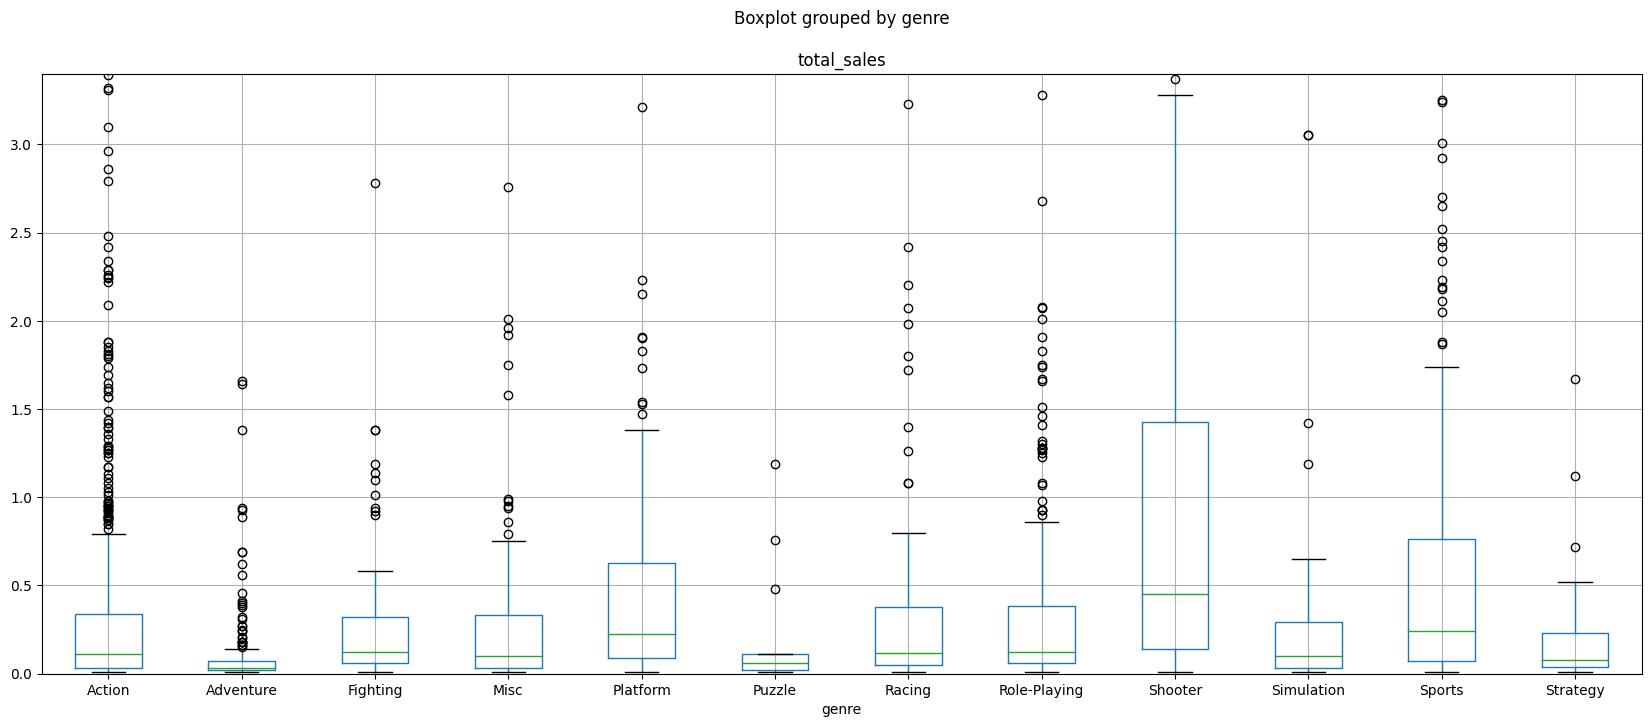

In [ ]:
#рассмотрим диаграммы размаха игр по жанрам без выбросов
games_work.boxplot(by='genre', column='total_sales', figsize=(20,8));
plt.ylim(0,3.4);

В лидерах по **максимальным значениям - экшены, ролевые игры и шутеры**. Но у ролевых игр и экшенов медианные показатели далеки от лучших - в этих категориях есть немало хитов, но основная часть игр не так популярна. **Наивысшие медианные значения - у шутеров, спортивных симуляторов и платформеров**. Шутеры демонстрируют стабильно хорошие продажи за период с 2013 года - есть много и хорошо продаваемых "середнячков", и бестселлеров.<br>
В аутсайдерах как по общим продажам, так и по квартильным показателям - **адвенчюры, паззлы и стратегии**. Игры, требующие больше головного мозга, чем спинного. Большинство людей хочет отдыхать головой в играх, поэтому неудивительно, что эти жанры расположены в конце списка. Но всё же интересный момент - изданных адвенчур очень много, они на 3 месте среди всех игр по количеству тайтлов. Видимо, эти игры интереснее разрабатывать, чем играть в них. Или же, скорее всего, стоимость и затраченное время разработки этих игр невелики, поэтому компании могут позволить себе выпускать их часто.

**Исследовательский анализ**<br>
В качестве рассматриваемого периода взят диапазон с **2013 года**, так как в этом году вышли последние на момент 2016 года консоли - **Sony PlayStation 4 и Microsoft Xbox One**. Эти консоли и продавались хорошо - в то время как продажи на остальных консолях постепенно снижались. Общий объем продаж на игровых консолях резко просел и **падал с рекордных 2008-2009 годов вплоть до 2013** - с этого года наблюдается небольшой рост, связанный с выходом новейших устройств, которые смогли немного переломить утвердившийся ниспадающий тренд.<br><br>
Пиковые продажи в 2013 году на **PS3 и XBox 360** связаны с выходом *Grand Theft Auto V*. **Экшн Grand Theft Auto V** позволяет уже устаревающим устройствам продержаться на плаву подольше, что видно по изломам графиков продаж на этих консолях в 2013 году. Тем не менее, самым стабильным по продажам жанром является **шутер**, а минимальные продажи - у **адвенчюр, паззлов и стратегии**, хотя у **стратегий** практически все релизы расположены в пределах "усов" - выбросов очень мало. Это может указывать на небольшую, но устоявшуюся аудиторию, которая стабильно покупает игры этого жанра.<br><br>
В результате анализа также было выявлено влияние оценок критиков на продажи игр, в то время как оценки игроков практически никак не изменяют число купленных копий игр. Логично предположить, что игроки ставят оценки уже после покупки игры, а оценки критиков как раз побуждают эти игры покупать (или не покупать).

<a id='4'></a>
## Портрет пользователя каждого региона
[К содержанию](#0)

In [ ]:
#определим вспомогательную функцию
def region_top (group, reg_sales):
    reg_top = games_work.groupby(group).agg({reg_sales: 'sum'}).sort_values(by=reg_sales, ascending=False)
    reg_top = reg_top.reset_index()
    reg_top.loc[5, reg_sales] = reg_top.loc[5:, reg_sales].sum()
    reg_top.loc[5, group] = 'other'
    reg_top = reg_top.loc[:5].set_index(group)
    return reg_top

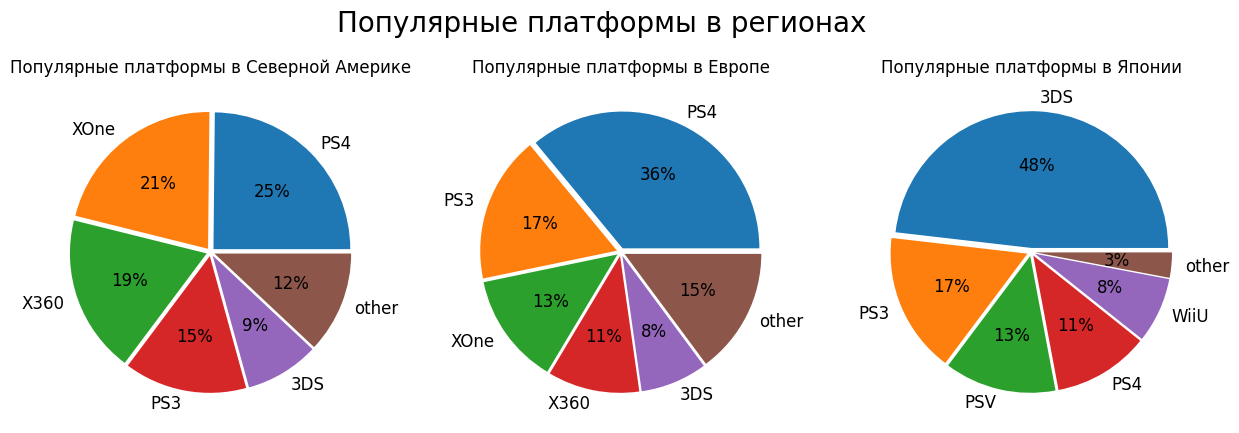

In [ ]:
#посмотрим самые популярные платформы по регионам
na_sales_plat = region_top('platform', 'na_sales')
eu_sales_plat = region_top('platform', 'eu_sales')
jp_sales_plat = region_top('platform', 'jp_sales')
fig, axes = plt.subplots(1, 3, figsize=(15,5));
fig.suptitle('Популярные платформы в регионах', fontsize=20)
explode = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
na_sales_plat.plot.pie(title='Популярные платформы в Северной Америке', y='na_sales', ylabel='',\
                       legend=False, autopct='%1.0f%%', fontsize=12, explode=explode, ax=axes[0]);
eu_sales_plat.plot.pie(title='Популярные платформы в Европе', y='eu_sales', ylabel='',\
                       legend=False, autopct='%1.0f%%', fontsize=12, explode=explode, ax=axes[1]);
jp_sales_plat.plot.pie(title='Популярные платформы в Японии', y='jp_sales', ylabel='',\
                       legend=False, autopct='%1.0f%%', fontsize=12, explode=explode, ax=axes[2]);

- В *Северной Америке* лидерство с небольшим перевесом удерживает **PS4**, далее за ней следует **XBox One**. С предыдущим поколением ситуация обратна - Майкрософтовская **XBox 360** в Америке оказался популярнее Сонивской **PS3**.
- *Европа* же выбирает консоли от Сони - на первом и втором месте **PS4** и **PS3**, коробки от Майкрософт **XBox One** и **XBox 360** на четвертом и пятом месте. На третьем месте - сборная солянка из различных устройств.
- Весь топ *Японии* - их родные консоли. Монолитное первое место - за **3DS**, следом устройства Sony - **PS3**, портативная **PS Vita** и только на четвертом месте **PS4**. Не так охотно японцы принимают новшества в игровых устройствах и любят долго посидеть на старом. Также можно отметить очень низкий процент остальных устройств - в них и расположились все устройства Microsoft.

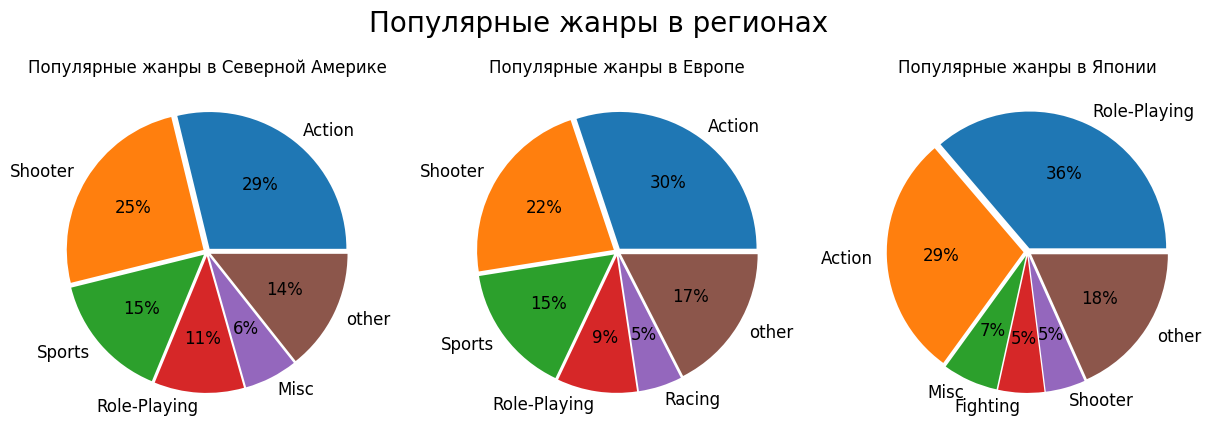

In [ ]:
#посмотрим самые популярные жанры по регионам
na_sales_genre = region_top('genre', 'na_sales')
eu_sales_genre = region_top('genre', 'eu_sales')
jp_sales_genre = region_top('genre', 'jp_sales')
fig, axes = plt.subplots(1, 3, figsize=(15,5));
fig.suptitle('Популярные жанры в регионах', fontsize=20)
explode = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
na_sales_genre.plot.pie(title='Популярные жанры в Северной Америке', y='na_sales', ylabel='',\
                       legend=False, autopct='%1.0f%%', fontsize=12, explode=explode, ax=axes[0]);
eu_sales_genre.plot.pie(title='Популярные жанры в Европе', y='eu_sales', ylabel='',\
                       legend=False, autopct='%1.0f%%', fontsize=12, explode=explode, ax=axes[1]);
jp_sales_genre.plot.pie(title='Популярные жанры в Японии', y='jp_sales', ylabel='',\
                       legend=False, autopct='%1.0f%%', fontsize=12, explode=explode, ax=axes[2]);

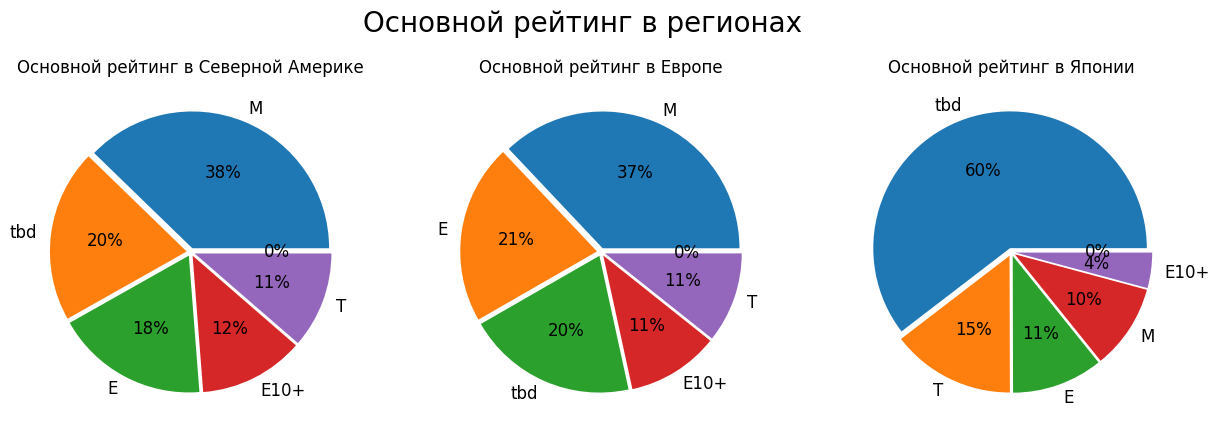

In [ ]:
#посмотрим основной рейтинг игр по регионам
na_sales_rating = region_top('rating', 'na_sales')
eu_sales_rating = region_top('rating', 'eu_sales')
jp_sales_rating = region_top('rating', 'jp_sales')
fig, axes = plt.subplots(1, 3, figsize=(15,5));
fig.suptitle('Основной рейтинг в регионах', fontsize=20)
explode = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
na_sales_rating.plot.pie(title='Основной рейтинг в Северной Америке', y='na_sales', ylabel='',\
                       legend=False, autopct='%1.0f%%', fontsize=12, explode=explode, ax=axes[0]);
eu_sales_rating.plot.pie(title='Основной рейтинг в Европе', y='eu_sales', ylabel='',\
                       legend=False, autopct='%1.0f%%', fontsize=12, explode=explode, ax=axes[1]);
jp_sales_rating.plot.pie(title='Основной рейтинг в Японии', y='jp_sales', ylabel='',\
                       legend=False, autopct='%1.0f%%', fontsize=12, explode=explode, ax=axes[2]);

- Опять же, история с рейтингами похожа в *Северной Америке и Европе* - в период с 2013 года вышло немало игр с рейтингом **"Для взрослых"**. Средний возраст геймеров в Америке и Европе растёт, поэтому популярность игр с этим рейтингом тоже растёт. Игры с рейтингом **«Для всех»** популярны, но в последние годы меньше, чем игры с рейтингом M. Из активно применяемы наименее популярен рейтинг **«Для подростков»**. Нельзя не заметить, что у многих игр возрастной рейтинг не определен - сведения либо отсутствуют, либо игры решили не получать этот рейтинг по каким-то причинам, хотя для продаж в Северной Америке и Европе его иметь всё же желательно, чтобы игру приняли на продажу в крупных магазинах.
- Естественно, в *Японии* на первом месте рейтинг **tbd** - для игр в Японии необязательна маркировка от ESRB. Далее следуют игры **"Для подростков"**, на третьем месте игры **"Для всех"**, а лидирующий в Северной Америке и Европе рейтинг М у японцев всего лишь на 4 месте с 10%.

<a id='5'></a>
## Проверка гипотез
[К содержанию](#0)

In [ ]:
#проводим проверку гипотезы по критерию Стьюдента

alpha_1 = 0.05
results_income_XOne_PC = st.ttest_ind(games_work.\
                                      query('platform == "XOne" and user_score > 0')['user_score'], \
                                      games_work.\
                                      query('platform == "PC" and user_score > 0')['user_score'])

print('p-значение:', results_income_XOne_PC.pvalue)

if (results_income_XOne_PC.pvalue < alpha_1):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.14012658403611647
Не отвергаем нулевую гипотезу


Для проверки обеих гипотез выбирается проверка по **критерию Стьюдента**, так как выборки независимы.<br>
В первом случае **нулевой гипотезой** считаем гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
**Альтернативной гипотезой** является гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC разные.<br>
Так как p-значение выше заданного порогового значения, то нулевая гипотеза о возможном равенстве средних пользовательских рейтинги платформ Xbox One и PC не отвергается.

In [ ]:
#проводим проверку второй гипотезы также по критерию Стьюдента

alpha_2 = 0.01
results_income_Action_Sports = st.ttest_ind(games_work.query('genre == "Sports" and user_score > 0')['user_score'],\
                                            games_work.query('genre == "Action" and user_score > 0')['user_score'])

print('p-значение:', results_income_Action_Sports.pvalue)

if (results_income_Action_Sports.pvalue < alpha_2):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Во втором случае **нулевая гипотеза** - средние пользовательские рейтинги жанров Action и Sports одинаковые. **Альтернативная гипотеза** - средние пользовательские рейтинги жанров Action и Sports разные.
Здесь p-значение ниже заданного порогового значения, поэтому нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, отвергается из-за низкой вероятности.

<a id='6'></a>
## Общий вывод
[К содержанию](#0)

Согласно приведённому анализу, с **2013** года рынок компьютерных (консольных) игр начинает немного восстанавливаться после продолжительного и сильного падения - суммарные продажи упали почти в 2,5 раза. Основной вклад в эти изменения вносят устройства новейших поколений - **PS4 и XBox One**. Также сильно подняла продажи сверхпопулярная *Grand Theft Auto V*, вышедшая изначально на предыдущем поколении (**PS3 и XBox 360**), а впоследствии портированная на большинство консолей. Однако очевидно, что рынок захватывают мобильные устройства, которые уже по разным оценкам составляют больше половины всего рынка игр. Это же привело и к тому, что теперь среднестатистическим игроком всё чаще по различным регионам являются женщины. В той же Японии, например, в последние годы уверенное лидерство на рынке держит портативная **Nintendo 3DS** (48% рынка), а на третьем по популярности месте расположена также портативная **PS Vita** (13% рынка).<br><br>
Всё же что касается именно игр на консольных устройствах, то самым популярным жанром является **Action**, удерживающий около трети всего рынка (только в Японии он не на первом, а на втором месте по популярности). Но надо учитывать, что высокие продажи связаны с огромным количеством игр этого жанра. Если говорить о наиболее стабильном и выгодном жанре, то на первом месте будут **Шутеры** - тоже похоже на экшн, но с большим уклоном в стрельбу. По этой причине рекомендуется на момент 2017 года разрабатывать игры этого жанра - их с большей вероятностью купят хорошим тиражом. В Северной Америке и Европе также хорошо заходят **спортивные симуляторы** - но этои 15% уже заняты классическими сериями типа FIFA, Madden NFL или NBA. В Японии на "ура" идут ролевые игры (36% от продаж), а из несколько отличающихся вариантов можно рассмотреть и **файтинги** - для Японии это топ-4 (5%).<br>
К наименее прибыльным вариантам во всех случаях относятся, к сожалению, **адвенчуры, паззлы и стратегии**. Делать их сложно, долго, муторно, а аудитория таких игр не очень велика, о чём говорят одни из самых низких продаж. Плюсом стратегий можно назвать очень низкий разброс показателей. Тем не менее, если идёт речь о прибыли, то три вышеназванных варианта - худшие.<br><br>
В Европе и Северной Америке стало много игр с рейтингом "Для взрослых" (37% и 38% соответственно). У 60% игр в Японии отсутствует маркировка ESRB, что указывает на сильную нацеленность на внутренний рынок, а из промаркированных ESRB релизов первое место занимают игры "Для подростков" (15%). Игры с таким рейтингом в Северной Америке и Европе хоть и находятся на последнем месте по популярности, но по доле рынка ушли недалеко - 11% в обоих регионах. <br><br>
Наблюдается *корреляция между оценками от критиков и продажами игр*, и гораздо более сильная, чем между *оценками игроков и продажами*. Предполагается, что более ранние положительные обзоры, которые критики могут выкатывать на всеобщее обозрение с бОльшим охватом, нежели это могут делать обычные игроки, стимулируют людей к покупке. Уже после покупки игрок может разочароваться и поставить низкую оценку - но игра уже будет куплена, и будет её возвращать человек или нет - вопрос открытый (да и далеко не во всех случаях это допускается). Поэтому не лишним будет направлять профессиональным критикам на обзор игры раньше.